# Visualization. 2 Categorical data

Introducción a la programación con Python.

Autor: Fernando Carazo Melo (email: fcarazo@tecnun.es)

More Info: https://seaborn.pydata.org/api.html

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

https://seaborn.pydata.org/api.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


# Load the example car crash dataset

crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


## Categorical data

There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

+ stripplot() (with kind="strip"; the default)
+ swarmplot() (with kind="swarm")

Categorical distribution plots:

+ boxplot() (with kind="box")
+ violinplot() (with kind="violin")
+ boxenplot() (with kind="boxen")

Categorical estimate plots:

+ pointplot() (with kind="point")
+  barplot() (with kind="bar")
+ countplot() (with kind="count")

These families represent the data using different levels of granularity. When knowing which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we’ll mostly focus on the figure-level interface, catplot(). Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Categorical scatterplots
The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


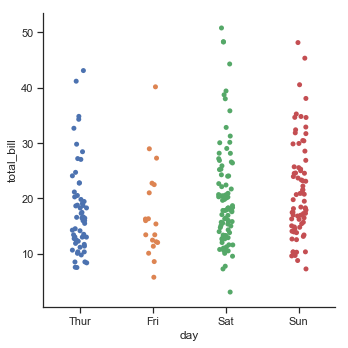

In [8]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips, kind = "strip"); # jitter = F

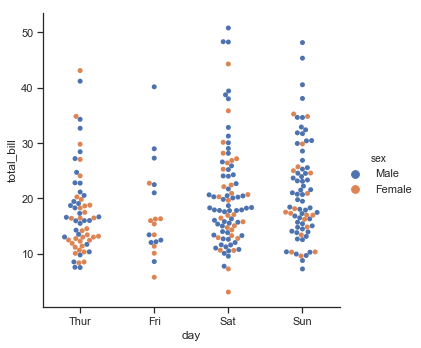

In [9]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);


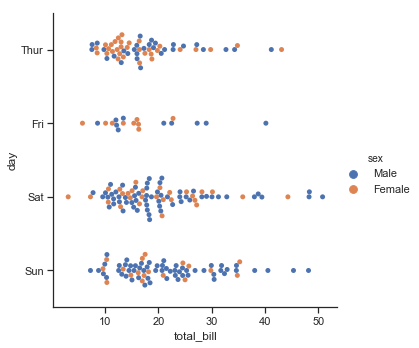

In [10]:
# flip axix
sns.catplot(y="day", x="total_bill", hue="sex", kind="swarm", data=tips);


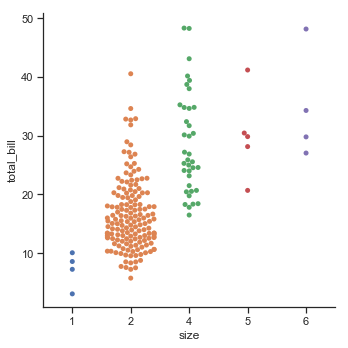

In [11]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips[tips["size"] != 3]);

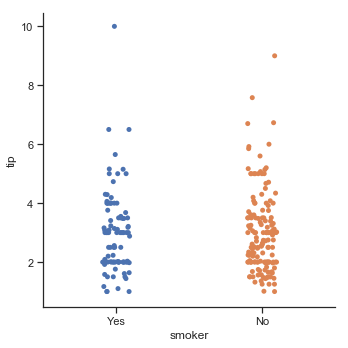

In [12]:
sns.catplot(x="smoker", y="tip", data=tips); # order=["No", "Yes"], 


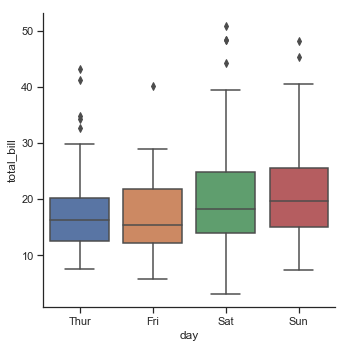

In [16]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)


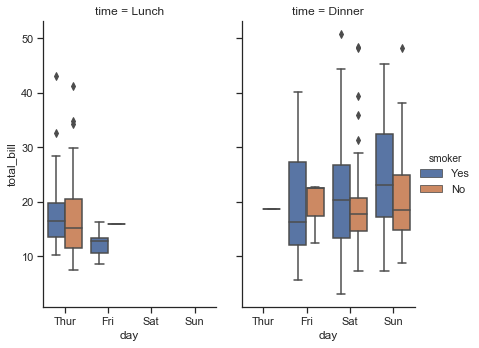

In [17]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="box", data=tips);